 # <font color=blue>      <div align="center"> Predictive maintenance of Turbofan Engine using Machine Learning

## Introduction
Predictive maintenance is a proactive maintenance strategy that aims to predict when equipment or machinery is likely to fail, allowing for timely maintenance actions to be taken. It relies on data analysis, machine learning, and predictive modeling techniques to assess the condition of assets and identify potential failures before they occur.

This approach promises cost savings over routine or time-based preventive maintenance, maintenance tasks are performed based on fixed schedules or time intervals, regardless of the actual condition of the equipment. 

The predictive maintenance of an aircraft's turbofan engine was performed using machine learning models constructed based on datasets obtained from the Prognostics Data Repository of NASA. A training set was utilized to build a model, which was then validated using a separate test dataset. The obtained results were compared with the actual results to calculate the accuracy of the models. The algorithm that yielded the highest accuracy was identified and selected

In this notebook we predict the Remaining Useful (RUL) Life of of an aircraft's turbofan engine was performed using machine learning models constructed based on datasets obtained from the Prognostics Data Repository of NASA.  Dataset considered is FD001 dataset which can also be accessed from link https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan. 

<img src="Tfan_schematic.png" width="400" height="800">


Data Set FD001 is the first in the series and the least complex.
Train trjectories: 100 engines. Test trajectories: 100 engines. Fault Modes: ONE. Datasets include simulations of multiple turbofan engines over time, each row contains the following information:

- Engine unit number

- Time, in cycles

- Three operational settings

- 21 sensor readings. 

## <font color="#ea1c60">Summary</font>  
[1. Data Exploration](#section_1)

[2. RUL et Data Visualisation ](#section_2)

[3. Modelling and Evaluation](#section_3)

[4. Conclusion](#section_4)

### <font id="section_1">1. Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import the data into a Pandas data frame. The data are in the form of text files,  There is  training, test and validation testing data:

In [3]:
#path = "C:/Users/moumouni/Desktop/projet6/Images"
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/CMaps.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done!')

Done!


In [20]:
# filepath to read data
#path = "C:/Users/moumouni/Desktop/survival/CMaps/"
path = '/content/CMaps/'

# define column names 
col_names=["unit_nb","time_cycle"]+["set_1","set_2","set_3"] + [f's_{i}' for i in range(1,22)]

# read data
df_train = train_data = pd.read_csv(path+"train_FD001.txt", index_col=False, 
                                    sep= "\s+", header = None,names=col_names )
df_test = pd.read_csv((path+'test_FD001.txt'), index_col=False, 
                      sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((path+'RUL_FD001.txt'), index_col=False, sep='\s+', header=None, names=['RUL'])

In [21]:
df_train.head()

,unit_nb,time_cycle,set_1,set_2,set_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


There are 20631 rows and 26 columns in train set and 13096 rows and 26 columns in the test set.

In [ ]:
df_train.shape

(20631, 26)

In [ ]:
df_test.shape

(13096, 26)

There no missing value.

In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
df_test.isnull().sum().sum()

0

In [ ]:
df_train['unit_nb'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
print(f"There are {len(df_train['unit_nb'].unique())} unique engines in the dataset")

There are 100 unique engines in the dataset


In [ ]:
df_train[col_names[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
time_cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
set_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
set_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
set_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100


Based on the description table provided above, it is evident that certain series exhibit a standard deviation (std) of zero or close to zero. As a result, we can exclude or drop such columns from further analysis. For example,  sensors 1, 10, 18 and 19 do not fluctuate at all. The observed fluctuations of the settings (set_1,set_2, set_3) are very small or negligible in magnitude, making it difficult to identify any other distinct operating conditions.

### <font id="section_2">2. RUL computation et data visualisation 

Here, we will visualize the data to determine the relevance of data and figure out the model determining attributes

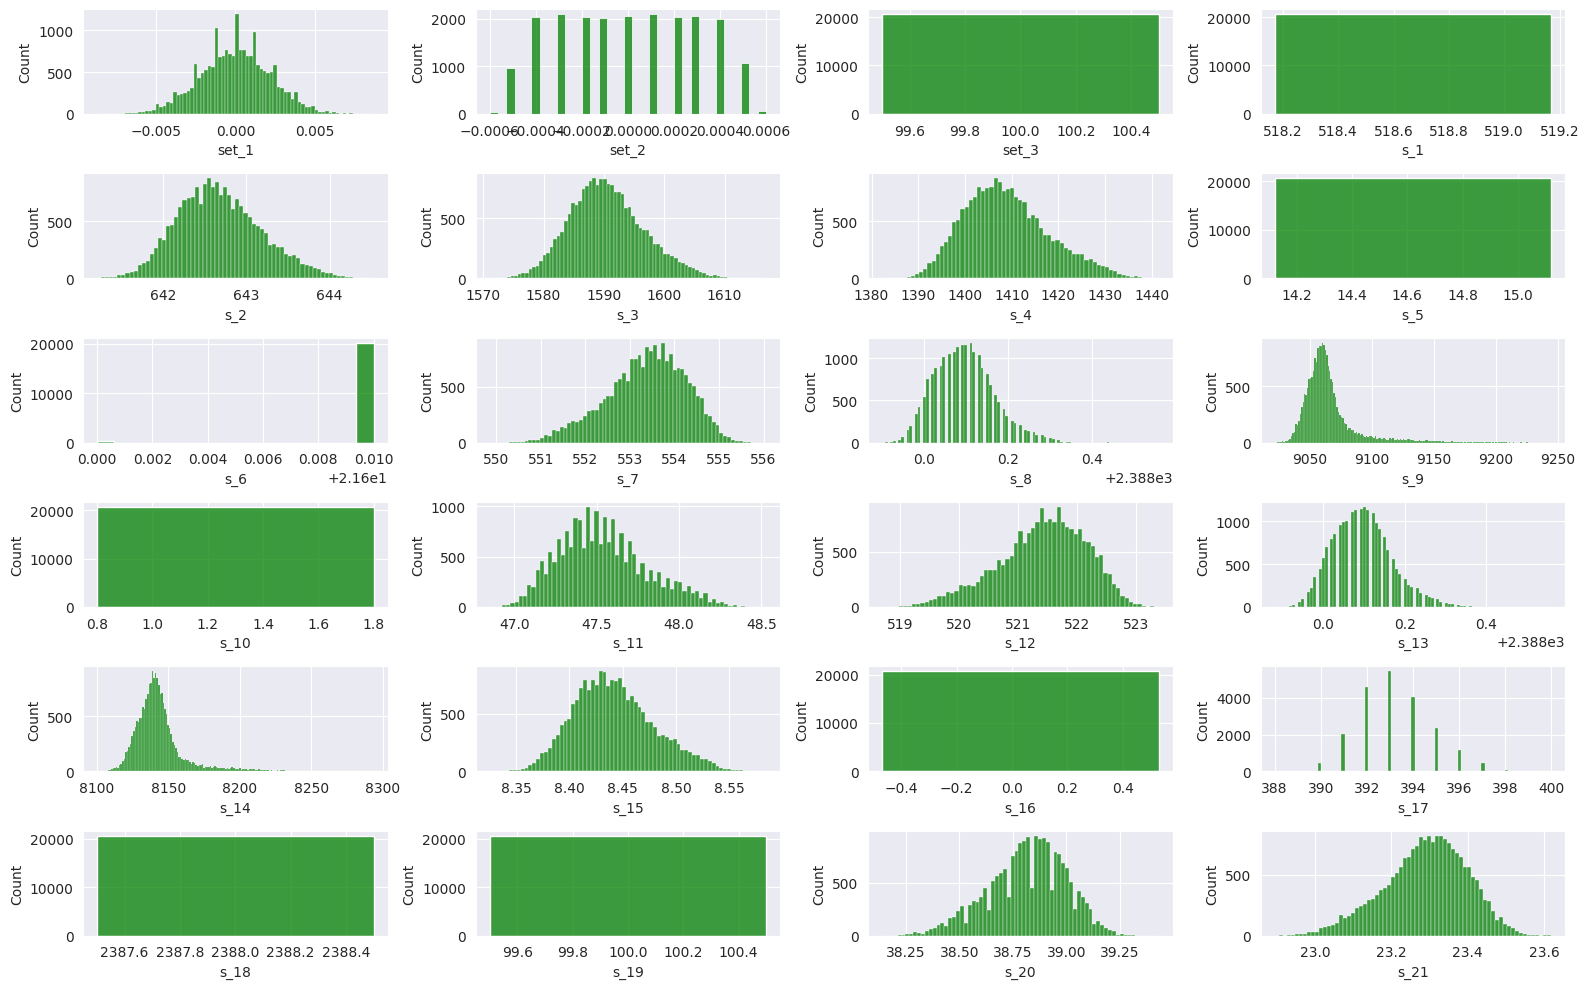

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
k = 1
for col in col_names[2:] :
    plt.subplot(6,4,k)
    sns.histplot(df_train[col],color='Green')
    k+=1
plt.tight_layout()
plt.show()

The distribution of some sensors are normally distributed and others are not.
Now, let's we compute and add the Remaining Useful Life (RUL) to the train dataset.

RUL = max life time cycle - current time cycle, where max life time cycle means time when engine fails.

In [22]:
def remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nb")
    max_cycle = grouped_by_unit["time_cycle"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nb', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycle"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
df_train = remaining_useful_life(df_train)
df_train.head()

,unit_nb,time_cycle,set_1,set_2,set_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [23]:
max_ruls = df_train.groupby('unit_nb').max().reset_index()
max_ruls.head()

,unit_nb,time_cycle,set_1,set_2,set_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


Let’s start by plotting the histogram of max RUL to understand its distribution.

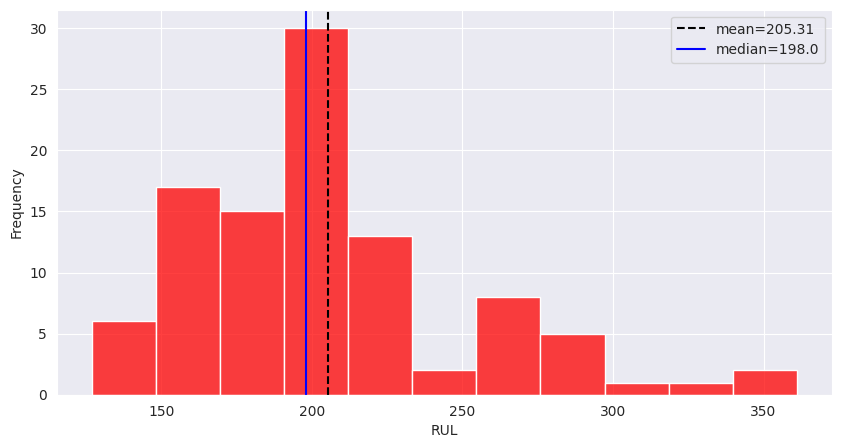

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(max_ruls.RUL, color='r')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.axvline(x=max_ruls.RUL.mean(), ls='--',color='k',label=f'mean={max_ruls.RUL.mean()}')
plt.axvline(x=max_ruls.RUL.median(),color='b',label=f'median={max_ruls.RUL.median()}')
plt.legend()
plt.show()

The histogram of the RUL distribution reveals that the majority of engines experience failure at approximately 200 cycles. Additionally, the distribution is slightly right-skewed, indicating that there are relatively few engines that last beyond 300 cycles.

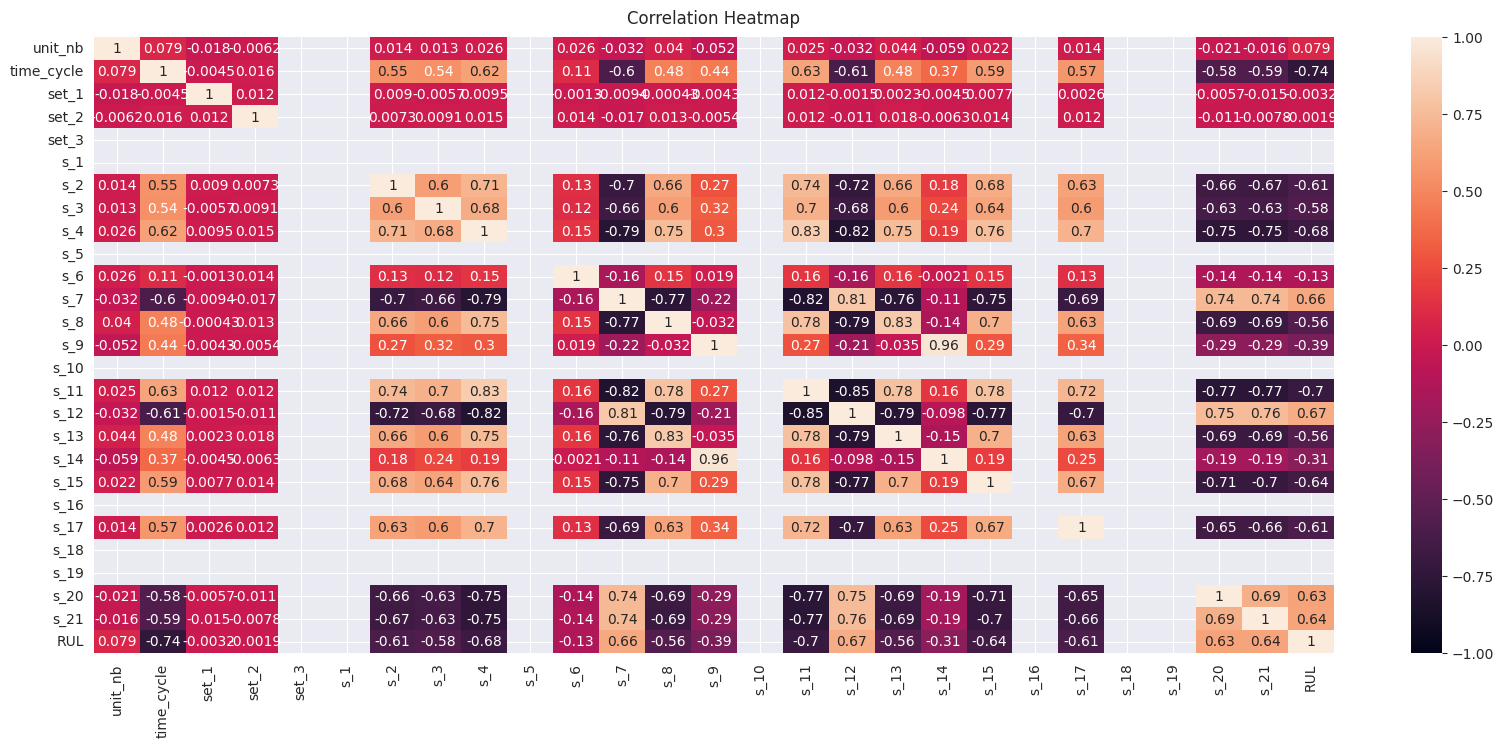

In [27]:
plt.figure(figsize=(20, 8))
cor_matrix = df_train.corr()
heatmap = sns.heatmap(cor_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

Sensor $s_9$  and $s_{14}$ are very correlated with correlation coefficient 0.96, thus we remove the feature $s_{14}$. We also drop features with standard deviation less than 0.0001 as they contain little information to help predict the RUL.

In [28]:
col = df_train.describe().columns
#we drop colummns with standard deviation is less than 0.0001
sensors_to_drop = list(col[df_train.describe().loc['std']<0.001]) + ['s_14']
print(sensors_to_drop)
# 
df_train.drop(sensors_to_drop,axis=1,inplace=True)
df_test.drop(sensors_to_drop,axis=1,inplace=True)

['set_2', 'set_3', 's_1', 's_5', 's_10', 's_16', 's_18', 's_19', 's_14']


In [29]:
df_train.columns

Index(['unit_nb', 'time_cycle', 'set_1', 's_2', 's_3', 's_4', 's_6', 's_7',
       's_8', 's_9', 's_11', 's_12', 's_13', 's_15', 's_17', 's_20', 's_21',
       'RUL'],
      dtype='object')

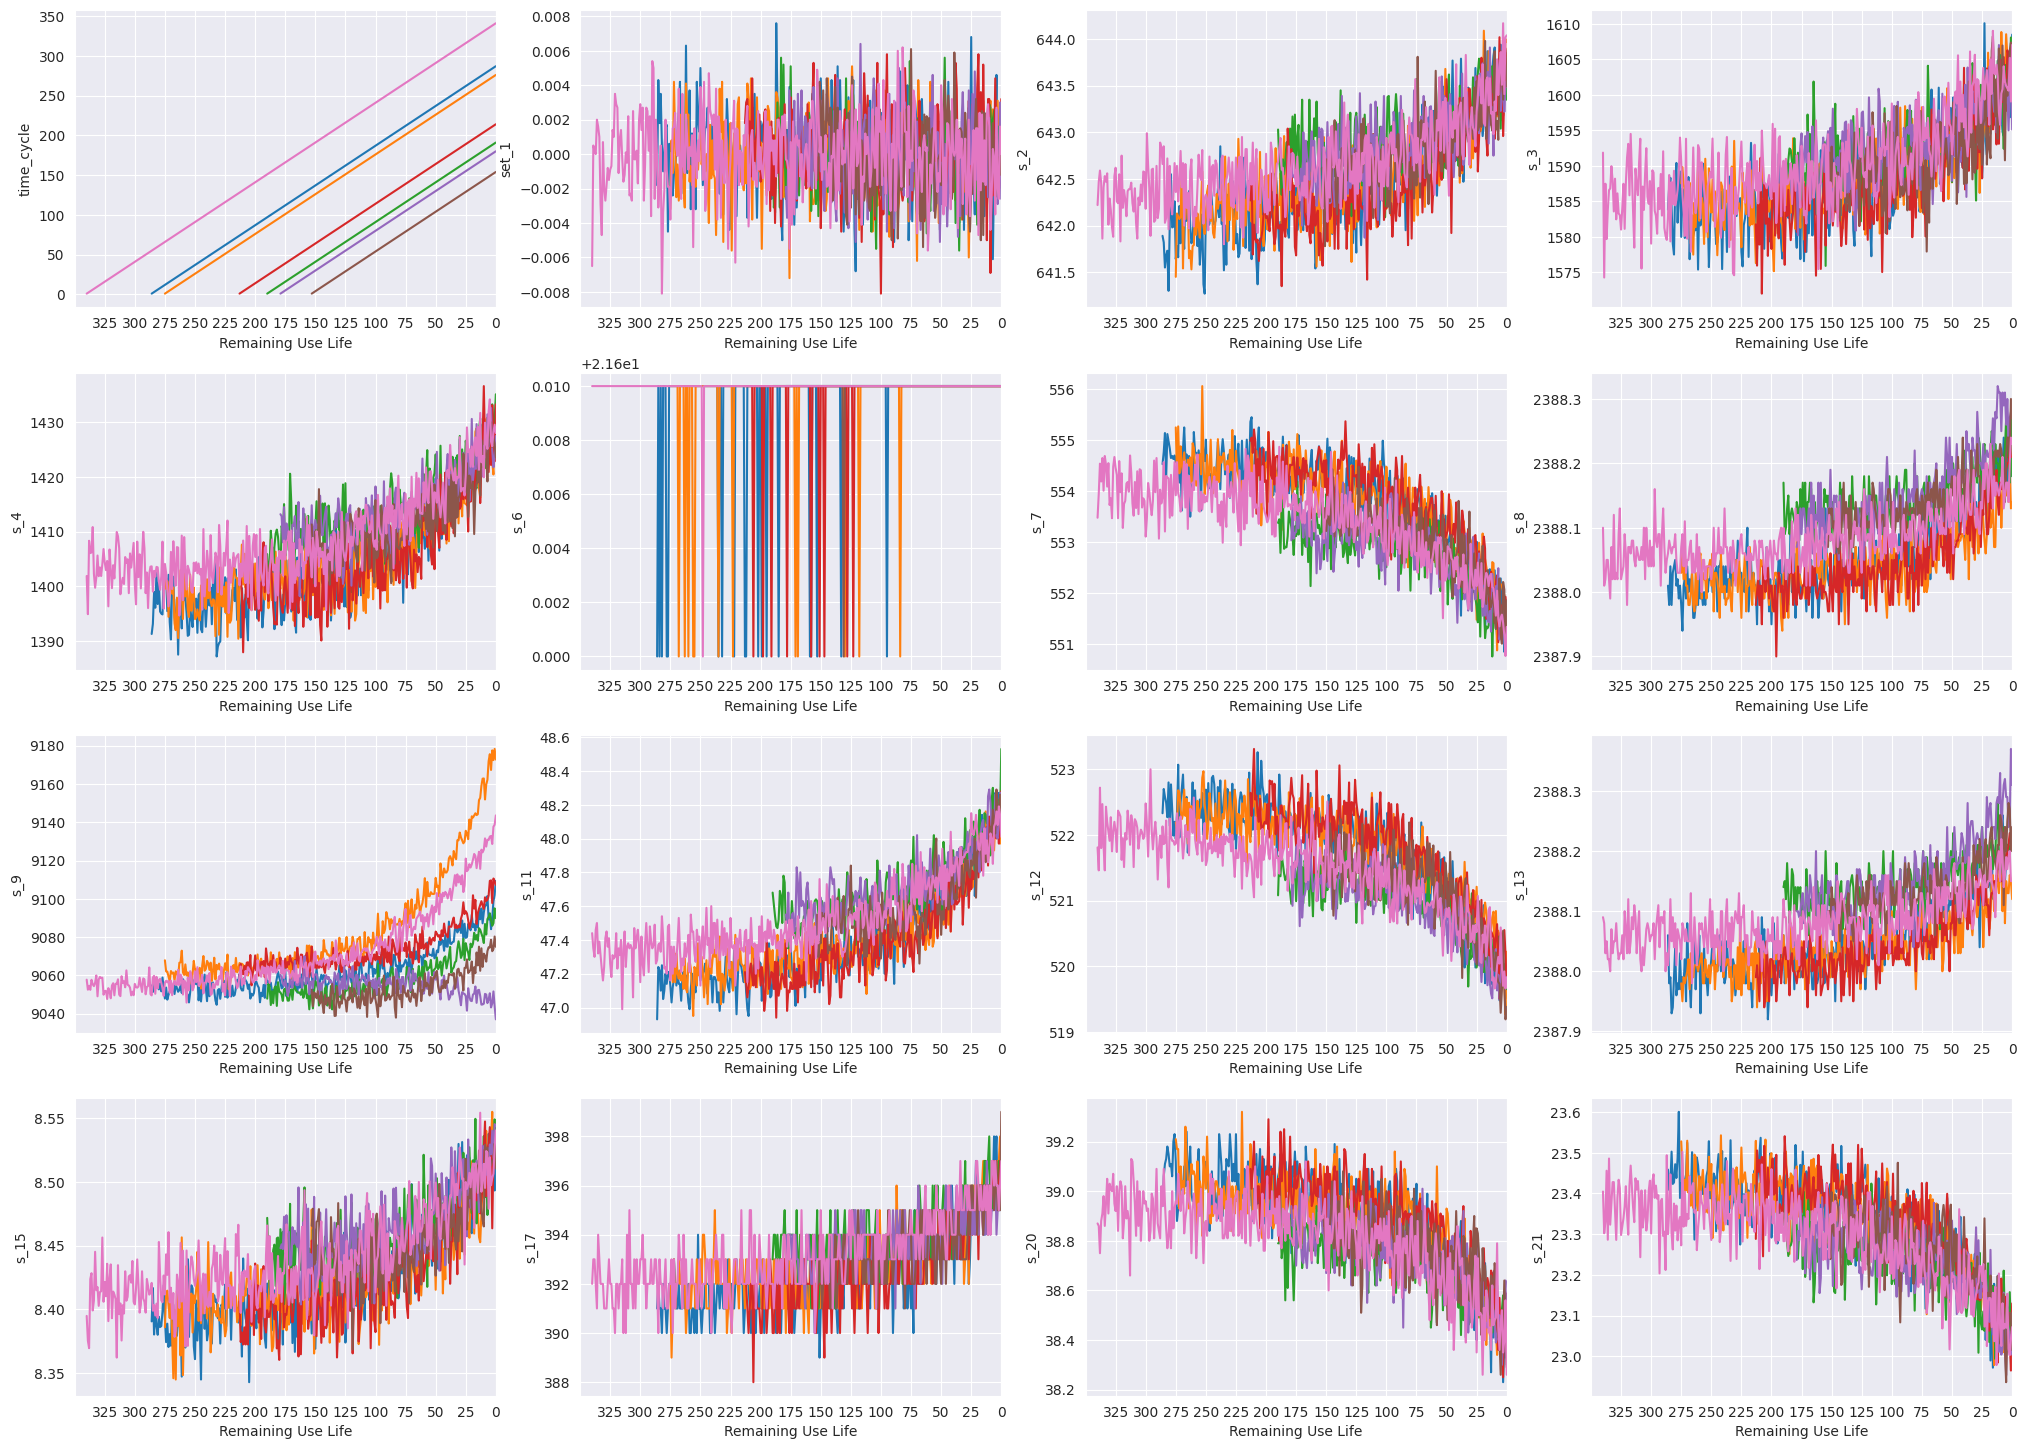

In [36]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(4,4, figsize=(25, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .22, wspace=.2)
i=0
axs = axs.ravel()
index = list(df_train.unit_nb.unique())
for sensor in df_train.columns[1:-1]:
    for idx in index[1:-1:15]:
        axs[i].plot('RUL', sensor,data=df_train[df_train.unit_nb==idx])
        
    axs[i].set_xlim(350,0)
    axs[i].set(xticks=np.arange(0, 350, 25))
    axs[i].set_ylabel(sensor)
    axs[i].set_xlabel('Remaining Use Life')
    i=i+1


We can observe sensors  have strong relation with the RUL (our dependent variable) in range of RUL from 125 to 0.

The graph of sensors $s_{21}$, $s_{20}$, $s_{12}$ and $s_7$ have strong relation with the RUL with similar decreased trend. 
The graph of sensors $s_{6}$ occasionally show downward peaks, but it doesn't show a clear correlation with RUL. The graph of the setting features set_1 shows no trend with the RUL. The raiminig sensor have strong relation with the RUL with similar increased trend.  

The remaining graph of sensor of the remaining sensors exhibits a strong correlation with  (RUL)  with similar increasing trend.

### <font id="section_3">3. Modelling and Evaluation

We will drop the columns unit_nb and  time_cycle which hold no information, for both train and test set. Further, because we only have True RUL values at the last cycle, we only look at the last cycle in the test set

In [37]:
X_train = df_train[df_train.columns[3:-1]]
y_train = df_train.RUL
X_test = df_test.groupby('unit_nb').last().reset_index()[df_train.columns[3:-1]]

In [38]:
X_train.head()

,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [39]:
X_test.head()

,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21
0,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8.4362,394,38.75,23.4117


In [40]:
y_train.describe()

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

We will set the upper limit of the computed RUL to 155, which represents the RUL for 75% of the engines. This upper bound yields accurate modeling results.

In [41]:
y_train = y_train.clip(upper=155)

Now, we define a matric function to evaluate our models. Because we deal with the regression problem we choose two scores to compare models. The Root Mean Squared Error (RMSE), and  R² score or the coefficient of determination. to indicate. It represents what proportion of dependent variable can be explained by the independent variables.

In [118]:
# create evalute function for train and test data
def evaluate(y_true, y_hat):
    RMSE = np.sqrt(mean_squared_error(y_true, y_hat))
    R2_score = r2_score(y_true, y_hat)
    return [RMSE,R2_score];

#Make Dataframe which will contain results
Results = pd.DataFrame(columns=['RMSE-Train','R2-Train','RMSE-Test','R2-Test','time-train (s)'])

#### Model 1: Linear Regression

In [119]:
import time
Sc = StandardScaler()
X_train1 = Sc.fit_transform(X_train)
X_test1 = Sc.transform(X_test)
# create and fit model
start = time.time()
lm = LinearRegression()
lm.fit(X_train1, y_train)
end_fit = time.time()- start
# predict and evaluate
y_pred_train = lm.predict(X_train1)
y_pred_test = lm.predict(X_test1)
Results.loc['LR']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.45666,0.693959,24.704646,0.646575,0.012826


Now we will Plot predicted versus actual RUL for the Test set.

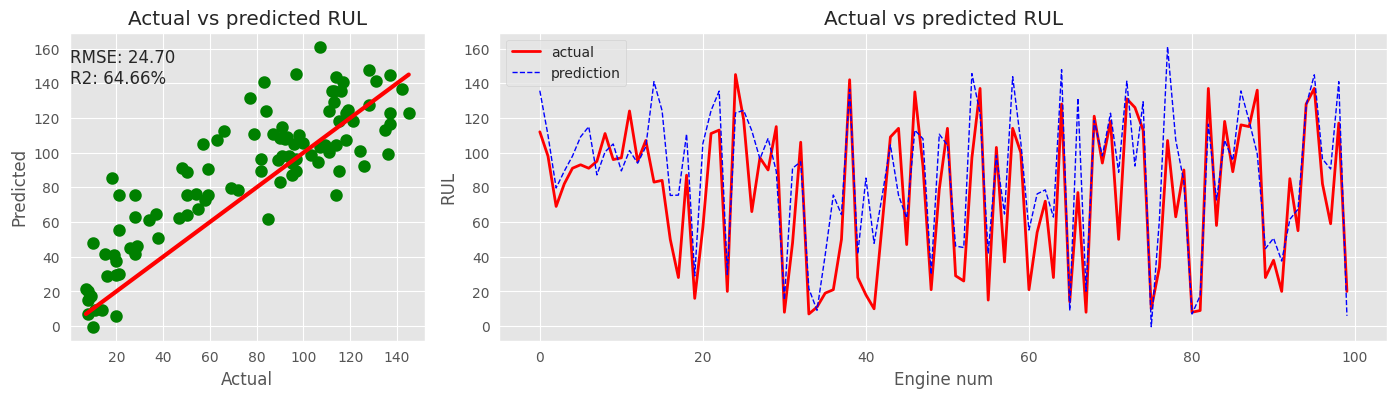

In [120]:
def plot_prediction(y_test,y_pred_test,score):
    plt.style.use("ggplot")  
    fig, ax = plt.subplots(1, 2, figsize=(17, 4), gridspec_kw={'width_ratios': [1.2, 3]})
    fig.subplots_adjust(wspace=.12)
    ax[0].plot([min(y_test),max(y_test)],
         [min(y_test),max(y_test)],lw=3,c='r')
    ax[0].scatter(y_test,y_pred_test,lw=3,c='g')
    ax[0].annotate(text=('RMSE: ' + "{:.2f}".format(score[0]) +'\n' +
                  'R2: ' + "{:.2%}".format(score[1])), xy=(0,140), size='large');
    ax[0].set_title('Actual vs predicted RUL')
    ax[0].set_xlabel('Actual')
    ax[0].set_ylabel('Predicted');
    
    ax[1].plot(range(0,100),y_test,lw=2,c='r',label = 'actual')
    ax[1].plot(range(0,100),y_pred_test,lw=1,ls='--', c='b',label = 'prediction')
    ax[1].legend()

    ax[1].set_title('Actual vs predicted RUL')
    ax[1].set_xlabel('Engine num')
    ax[1].set_ylabel('RUL');

plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))        

#### Model 2: SVM regression

The SVM algorithm is implemented using the 'RBF' (he Radial Basis Function) kernel.

In [121]:
# create and fit model
start = time.time()
svr = SVR(kernel="rbf", gamma=0.25, epsilon=0.05)
svr.fit(X_train1, y_train)
end_fit = time.time()-start 
# predict and evaluate
y_pred_train = svr.predict(X_train1)
y_pred_test = svr.predict(X_test1)
Results.loc['SVM']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.45666,0.693959,24.704646,0.646575,0.012826
SVM,26.84978,0.727546,23.949189,0.667859,16.787542


The Support Vector Regression (SVR) significantly improves accuracy. The R2 score has increased, and the RMSE has decreased for both the train and test data. These improvements suggest that SVR outperforms linear regression in terms of predictive accuracy. However, additional time and effort is required  in terms of model training and parameter tuning.

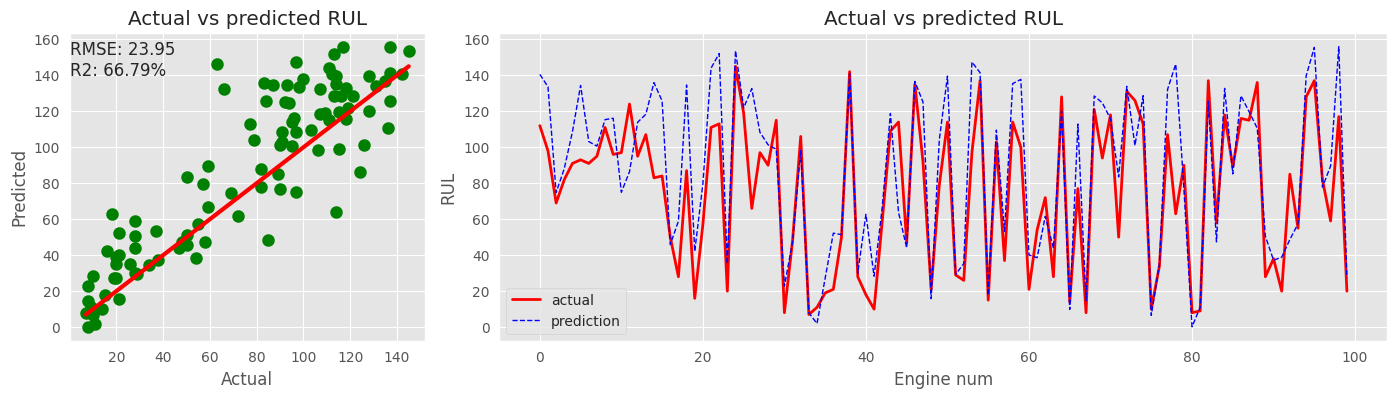

In [122]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test)) 

#### Model 3: Decision Tree regression

In [123]:
start=time.time()
dtr = DecisionTreeRegressor(random_state=42, max_features='sqrt', max_depth=10, min_samples_split=10)
dtr.fit(X_train1, y_train)
end_fit =time.time()-start
# predict and evaluate
y_pred_train = dtr.predict(X_train1)
y_pred_test = dtr.predict(X_test1)
Results.loc['DTree']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336


RMSE and R2 score highlight that the Decision three Regression yields significant improvements in accuracy compared to linear regression and SVM. 

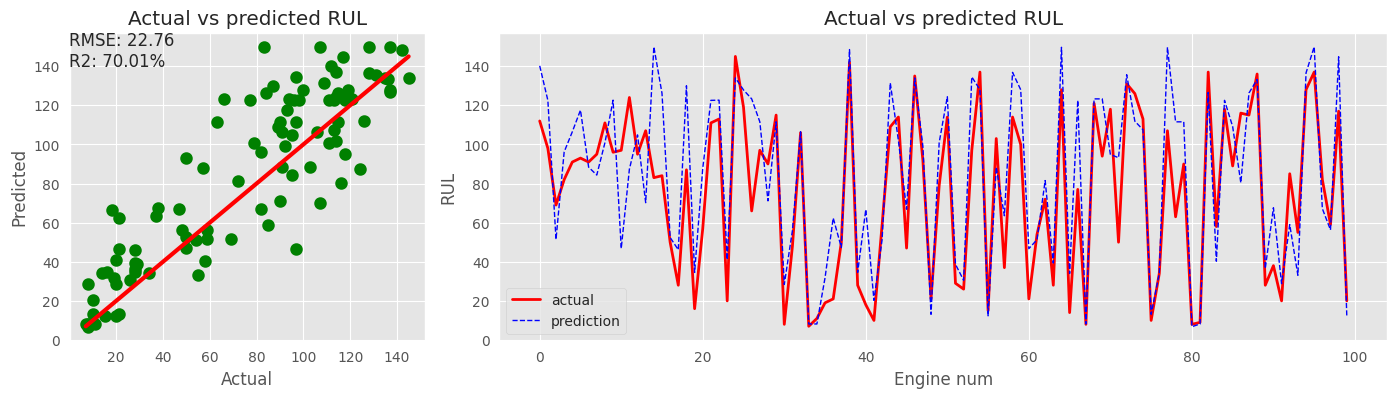

In [124]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))

#### Model 4: KNN model


The K nearest neighbor classifies tasks based on the similarity of data points in the feature space.

In [125]:
from sklearn.neighbors import KNeighborsRegressor
# Evaluating on Train Data Set
start = time.time()
Kneigh = KNeighborsRegressor(n_neighbors=7)
Kneigh.fit(X_train1, y_train)
end_fit =time.time()-start
# predict and evaluate
y_pred_train = Kneigh.predict(X_train1)
y_pred_test = Kneigh.predict(X_test1)
Results.loc['KNeigh']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336
KNeigh,23.563754,0.790154,22.518183,0.706365,0.049044


With KNN model performance is nearby to the Decision three Model.

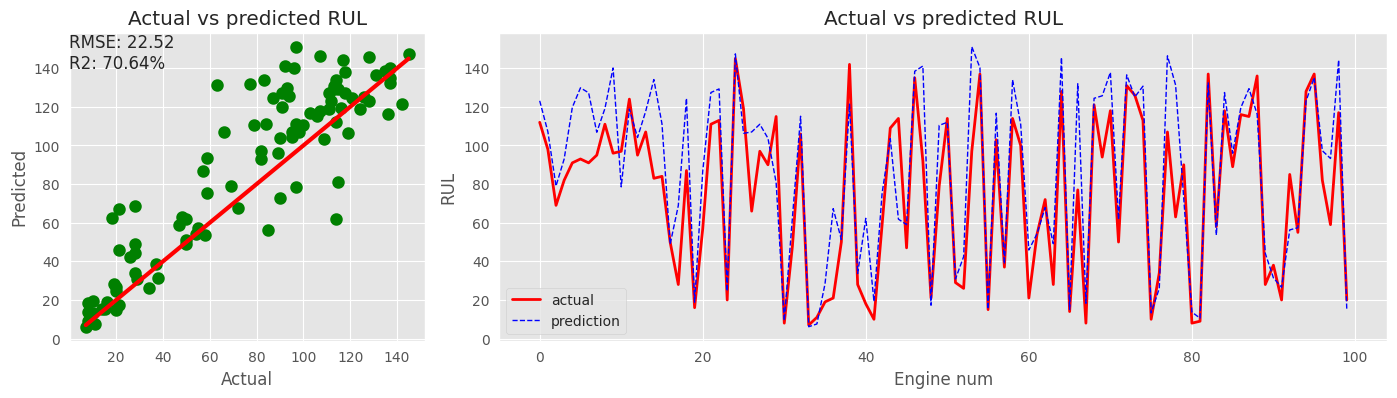

In [126]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))

#### Model 5: Random Forest

Random forest is an ensemble learning method that combines multiple decision trees to make predictions.

In [237]:
start = time.time()
rf = RandomForestRegressor(n_jobs=-1, n_estimators=130,max_features='sqrt', min_samples_split= 2, max_depth=10, random_state=42)
rf.fit(X_train1, y_train)
y_hat_train1 = rf.predict(X_train1)
end_fit = time.time()-start
# predict and evaluate
y_pred_train = rf.predict(X_train1)
y_pred_test = rf.predict(X_test1)
Results.loc['RF']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336
KNeigh,23.563754,0.790154,22.518183,0.706365,0.049044
RF,22.404126,0.810300,21.336893,0.736365,2.508146


The  Random Forest (RF) model outperforms all the previous models based on the RMSE and R2 score evaluation metrics.

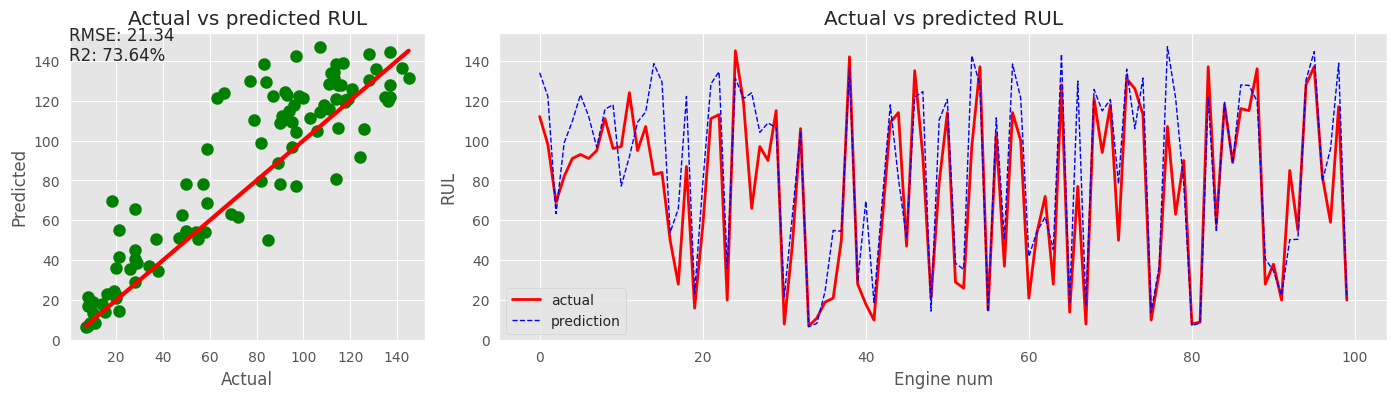

In [239]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))

#### Model 6  Gradient Boosting Regressor

Gradient Boosting belongs to the ensemble learning family, similar to Random Forest. The basic idea behind Gradient Boosting is to iteratively train a sequence of weak prediction models (typically decision trees) and combine their predictions to create a strong predictive model.

In [267]:
from sklearn.ensemble import GradientBoostingRegressor
# Evaluating on Train Data Set
start = time.time()
xgb_r = GradientBoostingRegressor(n_estimators=45, max_depth=10, min_samples_leaf=7, max_features='sqrt', random_state=42,learning_rate=0.11)
xgb_r.fit(X_train1, y_train)
end_fit =time.time()-start
# predict and evaluate
y_pred_train = xgb_r.predict(X_train1)
y_pred_test = xgb_r.predict(X_test1)
Results.loc['XGboost']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336
KNeigh,23.563754,0.790154,22.518183,0.706365,0.049044
RF,22.404126,0.810300,21.336893,0.736365,2.508146
XGboost,18.386075,0.872242,21.455220,0.733433,1.867511


There is some overfitting happening with Gradient Boost as  the difference between R2 score on train data and test data is high compared with that of the Random Forest. Thus to avoid such overfitting we use the voting regressor.

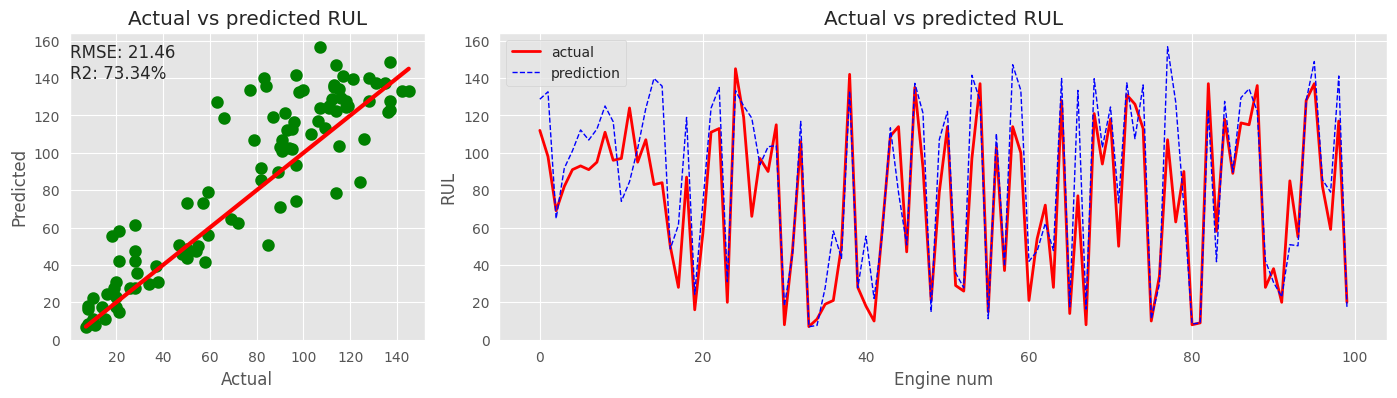

In [268]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))

#### Model 7: Voting Regressor

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses

Here we combine three models random forest with grandientboosting and model KNN, all these models are closly well performing.

In [276]:
from sklearn.ensemble import VotingRegressor
start=time.time()
Vot_R = VotingRegressor([("rf", rf), ("xgb", xgb_r)],weights=[1.5,1],n_jobs=-1)
Vot_R.fit(X_train1, y_train)
end_fit =time.time()-start
# predict and evaluate
y_pred_train = Vot_R.predict(X_train1)
y_pred_test = Vot_R.predict(X_test1)
Results.loc['VotingR']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336
KNeigh,23.563754,0.790154,22.518183,0.706365,0.049044
RF,22.404126,0.810300,21.336893,0.736365,2.508146
XGboost,18.386075,0.872242,21.455220,0.733433,1.867511
VotingR,20.627005,0.839201,21.134894,0.741333,3.144070


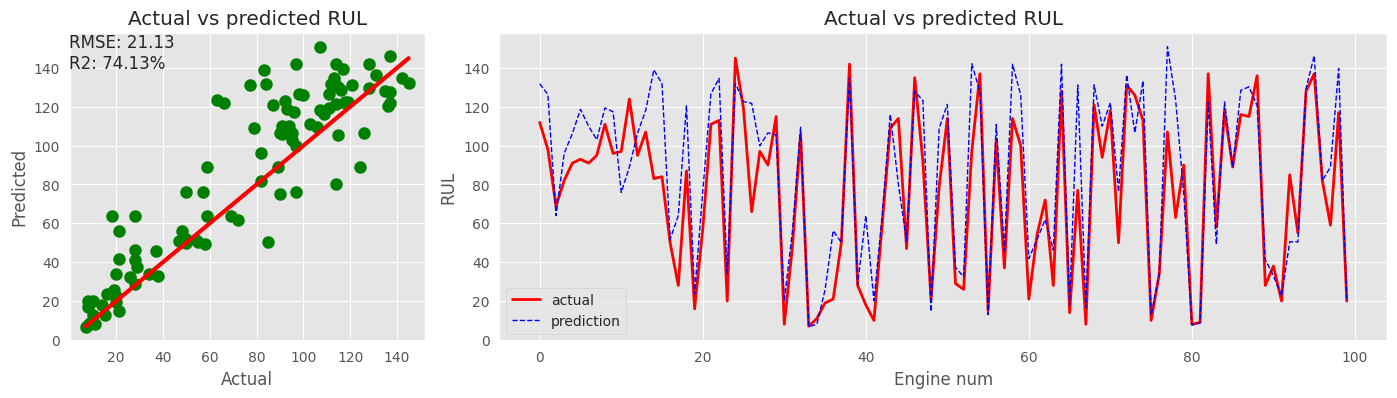

In [277]:
plot_prediction(y_test.RUL,y_pred_test,evaluate(y_test, y_pred_test))

#### Model 8 :  ANN Model

In [ ]:
star=time.time()
model = tf.keras.models.Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss= 'msle', optimizer='adam', metrics=['msle'])
history = model.fit(x=X_train1,y=y_train, epochs = 40, batch_size = 64)
end_fit = time.time()-star

In [309]:
# predict and evaluate
y_pred_train = model.predict(X_train1)
y_pred_test = model.predict(X_test1)
Results.loc['ANN']=evaluate(y_train, y_pred_train)+evaluate(y_test, y_pred_test)+[end_fit]
Results

4/4 [==============================] - 0s 2ms/step


,RMSE-Train,R2-Train,RMSE-Test,R2-Test,time-train (s)
LR,28.456660,0.693959,24.704646,0.646575,0.012826
SVM,26.849780,0.727546,23.949189,0.667859,16.787542
DTree,24.983823,0.764099,22.755621,0.700140,0.050336
KNeigh,23.563754,0.790154,22.518183,0.706365,0.049044
RF,22.404126,0.810300,21.336893,0.736365,2.508146
XGboost,18.386075,0.872242,21.455220,0.733433,1.867511
VotingR,20.627005,0.839201,21.134894,0.741333,3.144070
ANN,24.623042,0.770863,21.499629,0.732328,41.875780


### <font id="section_4">4 Conclusion




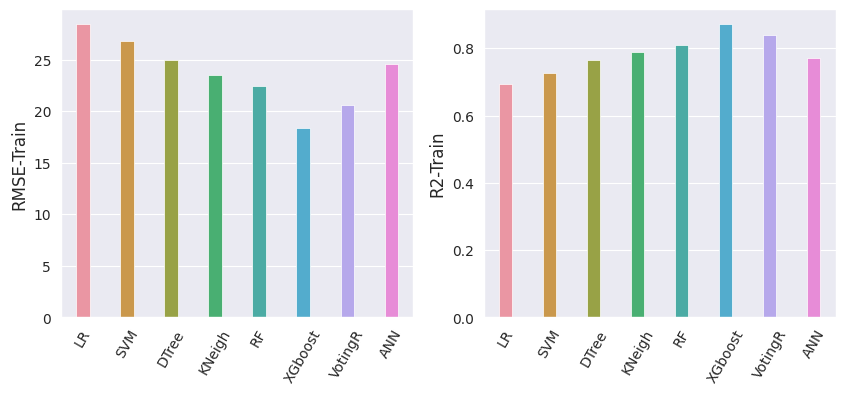

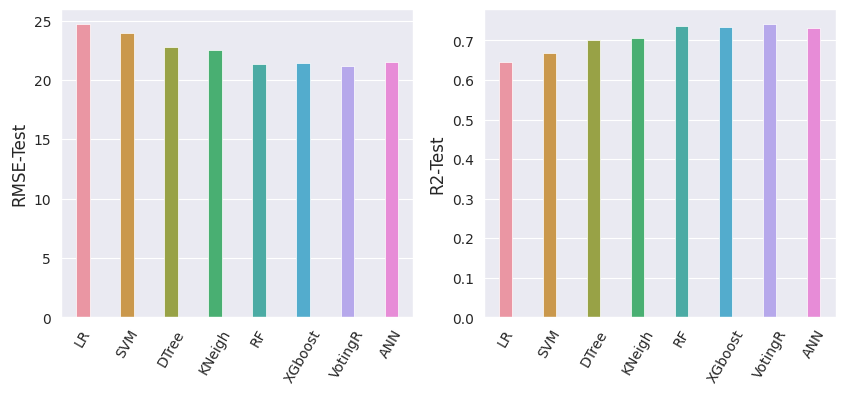

In [326]:
fig, axes = plt.subplots(1,2, figsize=(10, 4), facecolor='w', edgecolor='k')
for i in range(0,2):
    g = sns.barplot(ax=axes[i],data=Results,x=Results.index,y=Results.columns[i],width = 0.3)
    g.set_xticklabels(Results.index,rotation=60)

fig, axes = plt.subplots(1,2, figsize=(10, 4), facecolor='w', edgecolor='k')
for i in range(0,2):
    g = sns.barplot(ax=axes[i],data=Results,x=Results.index,y=Results.columns[i+2],width = 0.3)
    g.set_xticklabels(Results.index,rotation=60)    

The comparaison of the score R2 and RMSE for both train and test set shows that the best results were obtained by random forest. It capture the variance of multiple input variables simultaneously and leverage a large number of observations for prediction.

The Gradient Boost algorithm also yields good results with minimal overfitting. However, better results can be achieved by combining Random Forest (RF) and Gradient Boosting (GBoost) using the Voting Regressor technique.